In [1]:
!pip install tensorflow tensorflow-hub tensorflow-datasets pillow numpy matplotlib

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [5]:
import os

print("Training Images :")
dataset_Train_path = "/content/drive/MyDrive/dataset_fresh/Train"

for category in ["fresh", "rotten"]:
    folder_path = os.path.join(dataset_Train_path, category)
    print(f"{category}: {len(os.listdir(folder_path))} images")

print("Training Images :")

dataset_Test_path = "/content/drive/MyDrive/dataset_fresh/Test"

for category in ["fresh", "rotten"]:
    folder_path = os.path.join(dataset_Test_path, category)
    print(f"{category}: {len(os.listdir(folder_path))} images")


Training Images :
fresh: 11210 images
rotten: 12419 images
Training Images :
fresh: 3245 images
rotten: 3493 images


In [ ]:
# Restructuring the data
import shutil


base_dir = "/content/drive/MyDrive/dataset_fresh"
train_dir = os.path.join(base_dir, "Train")
test_dir = os.path.join(base_dir, "Test")


new_structure = {
    "train": {"fresh": [], "rotten": []},
    "test": {"fresh": [], "rotten": []}
}


def move_files(src_folder, dst_folder):
    if not os.path.exists(dst_folder):
        os.makedirs(dst_folder)
    for filename in os.listdir(src_folder):
        src_path = os.path.join(src_folder, filename)
        dst_path = os.path.join(dst_folder, filename)
        if os.path.isfile(src_path):
            shutil.move(src_path, dst_path)


for phase in ["train", "test"]:
    phase_dir = train_dir if phase == "train" else test_dir

    for category in os.listdir(phase_dir):
        category_path = os.path.join(phase_dir, category)


        if "fresh" in category.lower():
            new_category = "fresh"
        elif "rotten" in category.lower():
            new_category = "rotten"
        else:
            continue


        new_path = os.path.join(phase_dir, new_category)
        move_files(category_path, new_path)


        if os.path.exists(category_path) and not os.listdir(category_path):
            os.rmdir(category_path)



Found 23629 files belonging to 2 classes.
Found 6738 files belonging to 2 classes.
Classes: ['fresh', 'rotten']
Epoch 1/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 1481s 2s/step - accuracy: 0.9150 - loss: 0.2025 - val_accuracy: 0.9746 - val_loss: 0.0753
Epoch 2/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 1312s 2s/step - accuracy: 0.9764 - loss: 0.0658 - val_accuracy: 0.9828 - val_loss: 0.0492
Epoch 3/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 1344s 2s/step - accuracy: 0.9832 - loss: 0.0456 - val_accuracy: 0.9825 - val_loss: 0.0476
Epoch 4/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 1352s 2s/step - accuracy: 0.9841 - loss: 0.0392 - val_accuracy: 0.9868 - val_loss: 0.0394
Epoch 5/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 1352s 2s/step - accuracy: 0.9872 - loss: 0.0343 - val_accuracy: 0.9908 - val_loss: 0.0274
Epoch 6/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 1353s 2s/step - accuracy: 0.9905 - loss: 0.0259 - val_accuracy: 0.9927 - val_loss: 0.0205
Epoch 7/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 1396s 2s/step - accuracy: 0.9923 - loss: 0.0219 - val_accuracy: 0.99

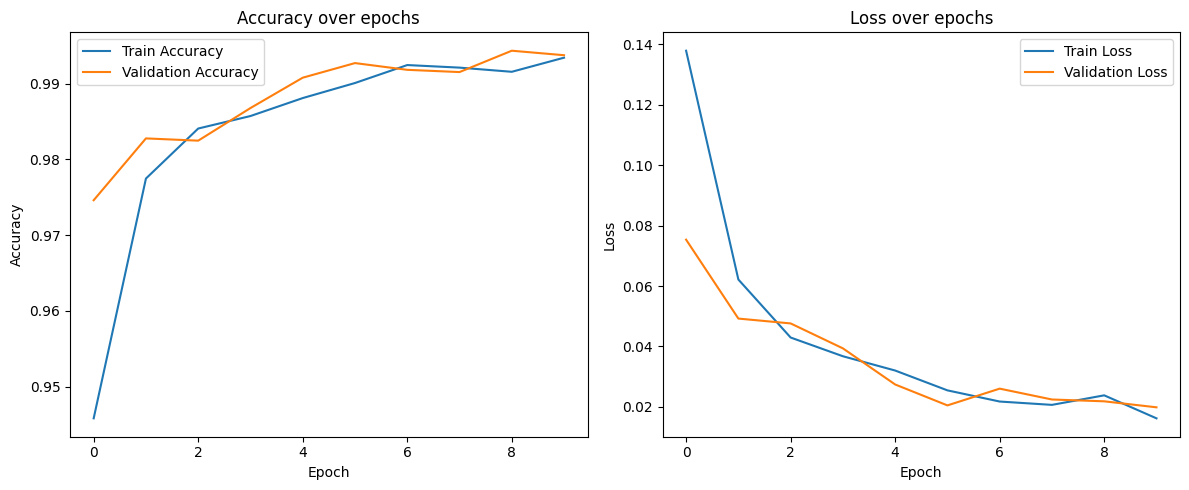

Saved artifact at '/tmp/tmpua0yv_98'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_314')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  136195411481360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136195411479056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136195123342864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136195411481168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136195411480592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136195123345936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136195123340176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136195123346320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136195123345552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136195123346704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1361951233

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

dataset_path = "/content/drive/MyDrive/dataset_fresh" # Change as per your file path
train_path = os.path.join(dataset_path, "Train")
test_path = os.path.join(dataset_path, "Test")

batch_size = 32
img_size = (224, 224)  # default input size

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False
)

class_names = train_data.class_names
print("Classes:", class_names)

normalization_layer = tf.keras.layers.Rescaling(1./255)
train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
test_data = test_data.map(lambda x, y: (normalization_layer(x), y))

base_model = keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False

model = keras.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

epochs = 10
history = model.fit(train_data,validation_data=test_data,epochs=epochs)

print("\nEvaluating model on test data...")

test_loss, test_acc = model.evaluate(test_data)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


test_preds = []
test_labels = []
for x, y in test_data:
    test_preds.extend(model.predict(x, verbose=0))
    test_labels.extend(y.numpy())

test_pred_classes = np.argmax(test_preds, axis=1)
test_labels = np.array(test_labels)

precision = precision_score(test_labels, test_pred_classes)
recall = recall_score(test_labels, test_pred_classes)
f1 = f1_score(test_labels, test_pred_classes)

print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(test_labels, test_pred_classes, target_names=class_names))

print("\nConfusion Matrix:")
print(confusion_matrix(test_labels, test_pred_classes))


plt.figure(figsize=(14, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Model to TensorFlow Lite for android Intergration
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


tflite_model_path = "/content/drive/MyDrive/mobilenet_freshness.tflite"
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print("✅ Model saved at:", tflite_model_path)

In [ ]:
model_path = "/content/drive/MyDrive/mobilenet_freshness.tflite"
